In [1]:
import sys
import numpy as np
from pyspark import SparkContext
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from pyspark.mllib.classification import LogisticRegressionWithSGD
from pyspark.mllib.clustering import KMeans
from sklearn.datasets import load_svmlight_file
from pyspark.ml.classification import LogisticRegression
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors


spark = SparkSession \
        .builder \
        .appName("Cloud_Computing_Project_farheen") \
        .getOrCreate()
sc = spark.sparkContext

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Cloud_Computing_Project').getOrCreate()
ratings = sqlContext.read.csv('/FileStore/tables/ratings.csv', header=True, inferSchema=True)

In [3]:
# Explore the data with Spark APIs
ratings.show(truncate=False)

+-------+-------+------+
book_id|user_id|rating|
+-------+-------+------+
1 |314 |5 |
1 |439 |3 |
1 |588 |5 |
1 |1169 |4 |
1 |1185 |4 |
1 |2077 |4 |
1 |2487 |4 |
1 |2900 |5 |
1 |3662 |4 |
1 |3922 |5 |
1 |5379 |5 |
1 |5461 |3 |
1 |5885 |5 |
1 |6630 |5 |
1 |7563 |3 |
1 |9246 |1 |
1 |10140 |4 |
1 |10146 |5 |
1 |10246 |4 |
1 |10335 |4 |
+-------+-------+------+
only showing top 20 rows

In [4]:
#Print the schema of the DataFrame:

ratings.printSchema()

root
-- book_id: integer (nullable = true)
-- user_id: integer (nullable = true)
-- rating: integer (nullable = true)

In [5]:
books = spark.read.load("/FileStore/tables/books.csv",
                     format="csv", inferSchema="true", header="true")

In [6]:
# Explore the data with Spark APIs
books.show(truncate=False)

+---+--------+------------+--------+-----------+----------+----------------+------------------------------------------------------+-------------------------+-------------------------------------------------------------+-----------------------------------------------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+-----------------------------------------------------------+-----------------------------------------------------------+
id |book_id |best_book_id|work_id |books_count|isbn |isbn13 |authors |original_publication_year|original_title |title |language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|image_url |small_image_url |
+---+--------+------------+--------+-----------+----------+----------------+------------------------------------------------------+-------------------------+-------------------------------------------------------------+-----------------------------------------------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+-----------------------------------------------------------+-----------------------------------------------------------+
1 |2767052 |2767052 |2792775 |272 |439023483 |9.78043902348E12|Suzanne Collins |2008.0 |The Hunger Games |The Hunger Games (The Hunger Games, #1) |eng |4.34 |4780653 |4942365 |155254 |66715.0 |127936 |560092 |1481305 |2706317 |https://images.gr-assets.com/books/1447303603m/2767052.jpg |https://images.gr-assets.com/books/1447303603s/2767052.jpg |
2 |3 |3 |4640799 |491 |439554934 |9.78043955493E12|J.K. Rowling, Mary GrandPré |1997.0 |Harry Potter and the Philosopher's Stone |Harry Potter and the Sorcerer's Stone (Harry Potter, #1) |eng |4.44 |4602479 |4800065 |75867 |75504.0 |101676 |455024 |1156318 |3011543 |https://images.gr-assets.com/books/1474154022m/3.jpg |https://images.gr-assets.com/books/1474154022s/3.jpg |
3 |41865 |41865 |3212258 |226 |316015849 |9.78031601584E12|Stephenie Meyer |2005.0 |Twilight |Twilight (Twilight, #1) |en-US |3.57 |3866839 |3916824 |95009 |456191.0 |436802 |793319 |875073 |1355439 |https://images.gr-assets.com/books/1361039443m/41865.jpg |https://images.gr-assets.com/books/1361039443s/41865.jpg |
4 |2657 |2657 |3275794 |487 |61120081 |9.78006112008E12|Harper Lee |1960.0 |To Kill a Mockingbird |To Kill a Mockingbird |eng |4.25 |3198671 |3340896 |72586 |60427.0 |117415 |446835 |1001952 |1714267 |https://images.gr-assets.com/books/1361975680m/2657.jpg |https://images.gr-assets.com/books/1361975680s/2657.jpg |
5 |4671 |4671 |245494 |1356 |743273567 |9.78074327356E12|F. Scott Fitzgerald |1925.0 |The Great Gatsby |The Great Gatsby |eng |3.89 |2683664 |2773745 |51992 |86236.0 |197621 |606158 |936012 |947718 |https://images.gr-assets.com/books/1490528560m/4671.jpg |https://images.gr-assets.com/books/1490528560s/4671.jpg |
6 |11870085|11870085 |16827462|226 |525478817 |9.78052547881E12|John Green |2012.0 |The Fault in Our Stars |The Fault in Our Stars |eng |4.26 |2346404 |2478609 |140739 |47994.0 |92723 |327550 |698471 |1311871 |https://images.gr-assets.com/books/1360206420m/11870085.jpg|https://images.gr-assets.com/books/1360206420s/11870085.jpg|
7 |5907 |5907 |1540236 |969 |618260307 |9.7806182603E12 |J.R.R. Tolkien |1937.0 |The Hobbit or There and Back Again |The Hobbit |en-US |4.25 |2071616 |2196809 |37653 |46023.0 |76784 |288649 |665635 |1119718 |https://images.gr-assets.com/books/1372847500m/5907.jpg |https://images.gr-assets.com/books/1372847500s/5907.jpg |
8 |5107 |5107 |3036731 |360 |316769177 |9.78031676917E12|J.D. Salinger |1951.0 |The Catcher in the Rye |The Catcher in the Rye |eng |3.79 |2044241 |2120637 |44920 |109383.0 |185520 |455042 |661516 |709176 |https://images.gr-assets.com/books/1398034300m/5107.jpg |https://images.gr-assets.com/books/1398034300s/5107.jpg 

In [7]:
#Print the schema of the DataFrame:

books.printSchema()

root
-- id: integer (nullable = true)
-- book_id: integer (nullable = true)
-- best_book_id: integer (nullable = true)
-- work_id: integer (nullable = true)
-- books_count: integer (nullable = true)
-- isbn: string (nullable = true)
-- isbn13: double (nullable = true)
-- authors: string (nullable = true)
-- original_publication_year: double (nullable = true)
-- original_title: string (nullable = true)
-- title: string (nullable = true)
-- language_code: string (nullable = true)
-- average_rating: string (nullable = true)
-- ratings_count: string (nullable = true)
-- work_ratings_count: string (nullable = true)
-- work_text_reviews_count: string (nullable = true)
-- ratings_1: double (nullable = true)
-- ratings_2: integer (nullable = true)
-- ratings_3: integer (nullable = true)
-- ratings_4: integer (nullable = true)
-- ratings_5: integer (nullable = true)
-- image_url: string (nullable = true)
-- small_image_url: string (nullable = true)

In [8]:
ratings.describe().show()

+-------+-----------------+------------------+------------------+
summary| book_id| user_id| rating|
+-------+-----------------+------------------+------------------+
 count| 981756| 981756| 981756|
 mean|4943.275635697668|25616.759933221696|3.8565335989797873|
 stddev|2873.207414896143|15228.338825882149|0.9839408559619973|
 min| 1| 1| 1|
 max| 10000| 53424| 5|
+-------+-----------------+------------------+------------------+

In [9]:
print('Number of different users: {}'.format(ratings.select('user_id').distinct().count()))
print('Number of different books: {}'.format(ratings.select('book_Id').distinct().count()))
print('Number of books with at least one rating strictly higher than 4: {}'.format(ratings.filter('rating > 4').select('book_Id').distinct().count()))

Number of different users: 53424
Number of different books: 10000
Number of books with at least one rating strictly higher than 4: 9999

In [10]:
ratings.createOrReplaceTempView('ratings')
spark.sql('SELECT COUNT(DISTINCT(book_id)) AS nb FROM ratings WHERE rating > 4').show()

+----+
 nb|
+----+
9999|
+----+

In [11]:
!pip install --upgrade pandas

In [12]:
import pandas as pd

ratings.toPandas().head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [13]:
import seaborn as sns
ratingsPandas = ratings.toPandas()
sns.lmplot(x='user_id', y='book_id', data=ratingsPandas, fit_reg=False);

In [14]:
!pip install --upgrade seaborn

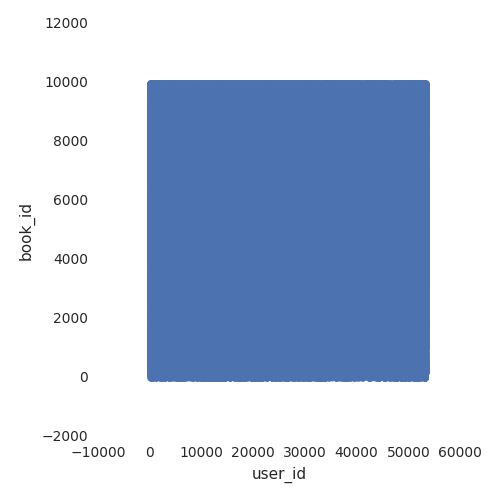

In [15]:
display()

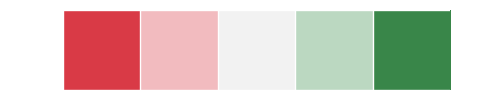

In [16]:
sns.palplot(sns.diverging_palette(10, 133, sep=80, n=5))
display()

In [17]:
lm = sns.lmplot(x='user_id', y='book_id', hue='rating', data=ratingsPandas, fit_reg=False, aspect=2, palette=sns.diverging_palette(10, 133, sep=80, n=5))
axes = lm.axes
axes[0, 0].set_ylim(0, 10000) # max book_id is 163949
axes[0, 0].set_xlim(0,  53424) # max userId is 671
lm;

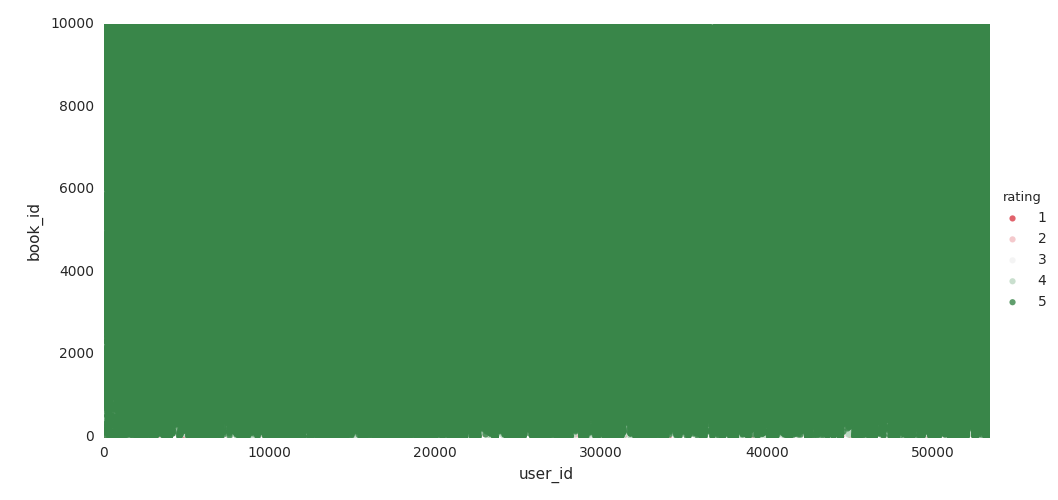

In [18]:
display()

In [19]:
sns.violinplot([ratingsPandas.rating]);

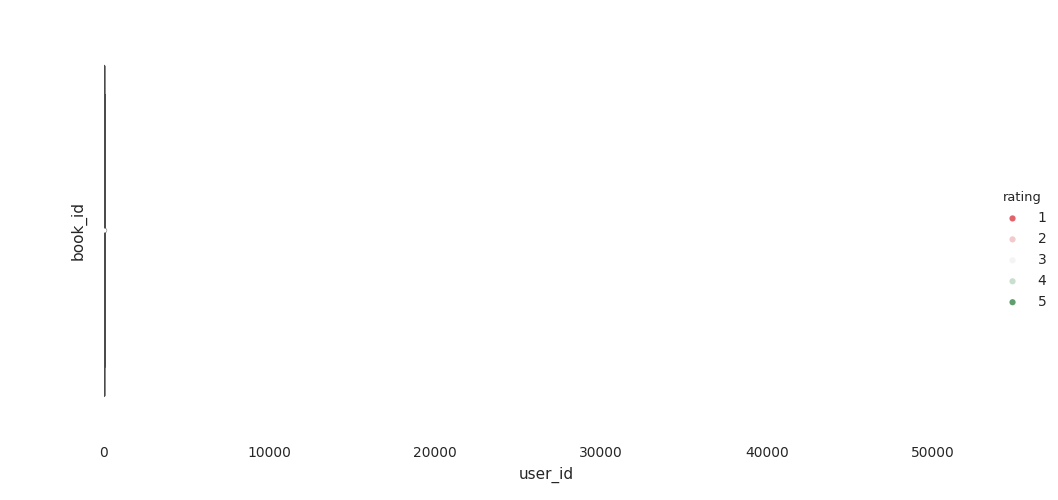

In [20]:
display()

In [21]:
# Train the Model
from pyspark.ml.recommendation import ALS

model = ALS(userCol='user_id', itemCol='book_id', ratingCol='rating').fit(ratings)

In [22]:
#Run the Model
predictions = model.transform(ratings)
predictions.toPandas().head()

,book_id,user_id,rating,prediction
0,148,35982,3,3.292058
1,148,20467,3,2.954065
2,148,588,4,3.382935
3,148,9731,3,2.982782
4,148,3087,3,3.435217


In [23]:
#Evaluate the Model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')
print('The root mean squared error for our model is: {}'.format(evaluator.evaluate(predictions)))

The root mean squared error for our model is: 0.5961435265653865

In [24]:
#Split the dataset 
(trainingRatings, testRatings) = ratings.randomSplit([80.0, 20.0])

In [25]:
als = ALS(userCol='user_id', itemCol='book_id', ratingCol='rating')
model = als.fit(trainingRatings)
predictions = model.transform(testRatings)

In [26]:
predictions.toPandas().head()

,book_id,user_id,rating,prediction
0,148,588,4,3.424580
1,148,28767,3,2.754104
2,148,22164,3,3.261525
3,148,6630,3,3.347558
4,148,13034,4,3.339956


In [27]:
evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')
print('The root mean squared error for our model is: {}'.format(evaluator.evaluate(predictions)))

The root mean squared error for our model is: nan

In [28]:
#Handle  NAN value
avgRatings = ratings.select('rating').groupBy().avg().first()[0]
print ('The average rating in the dataset is: {}'.format(avgRatings))

evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')
print ('The root mean squared error for our model is: {}'.format(evaluator.evaluate(predictions.na.fill(avgRatings))))

The average rating in the dataset is: 3.8565335989797873
The root mean squared error for our model is: 0.9068868737468402

In [29]:
evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')
print ('The root mean squared error for our model is: {}'.format(evaluator.evaluate(predictions.na.drop())))

The root mean squared error for our model is: 0.9065063357490802

## Improve performance 'repeatALS'

In [30]:
#improve the performance score
def repeatALS(data, k=3, userCol='user_id', itemCol='book_id', ratingCol='rating', metricName='rmse'):
    evaluations = []
    for i in range(0, k):  
        (trainingSet, testingSet) = data.randomSplit([k - 1.0, 1.0])
        als = ALS(userCol=userCol, itemCol=itemCol, ratingCol=ratingCol)
        model = als.fit(trainingSet)
        predictions = model.transform(testingSet)
        evaluator = RegressionEvaluator(metricName=metricName, labelCol='rating', predictionCol='prediction')
        evaluation = evaluator.evaluate(predictions.na.drop())
        print('Loop {}: {} = {}'.format(i + 1, metricName, evaluation))
        evaluations.append(evaluation)
    return sum(evaluations) / float(len(evaluations))

In [31]:
print('RMSE = {}'.format(repeatALS(ratings, k=4)))

Loop 1: rmse = 0.915501273920143
Loop 2: rmse = 0.913411969845521
Loop 3: rmse = 0.9169916034863236
Loop 4: rmse = 0.9181938895690115
RMSE = 0.9160246842052497

## Improve the performance 'kfoldALS'

In [32]:
def kfoldALS(data, k=3, userCol='user_id', itemCol='book_id', ratingCol='rating', metricName='rmse'):
    evaluations = []
    weights = [1.0] * k
    splits = data.randomSplit(weights)
    for i in range(0, k):  
        testingSet = splits[i]
        trainingSet = spark.createDataFrame(sc.emptyRDD(), data.schema)
        for j in range(0, k):
            if i == j:
                continue
            else:
                trainingSet = trainingSet.union(splits[j])
        als = ALS(userCol=userCol, itemCol=itemCol, ratingCol=ratingCol)
        model = als.fit(trainingSet)
        predictions = model.transform(testingSet)
        evaluator = RegressionEvaluator(metricName=metricName, labelCol='rating', predictionCol='prediction')
        evaluation = evaluator.evaluate(predictions.na.drop())
        print('Loop {}: {} = {}'.format(i + 1, metricName, evaluation))
        evaluations.append(evaluation)
    return sum(evaluations) / float(len(evaluations))

In [33]:
#Compute the average performance score for 4 folds:

print('RMSE = {}'.format(kfoldALS(ratings, k=4)))

Loop 1: rmse = 0.9148763429349793
Loop 2: rmse = 0.9190247653005
Loop 3: rmse = 0.9163627781148731
Loop 4: rmse = 0.9180543387905414
RMSE = 0.9170795562852235

In [34]:
#Now compute the average performance score for 10 folds:

print('RMSE = {}'.format(kfoldALS(ratings, k=10)))

Loop 1: rmse = 0.892847988616503
Loop 2: rmse = 0.8958745684103944
Loop 3: rmse = 0.8924409865750748
Loop 4: rmse = 0.8939618217592261
Loop 5: rmse = 0.8888267848610077
Loop 6: rmse = 0.8935597242903138
Loop 7: rmse = 0.8912509360878283
Loop 8: rmse = 0.8896907406050837
Loop 9: rmse = 0.8952338129206565
Loop 10: rmse = 0.8956223453080318
RMSE = 0.892930970943412

## Improve the model

In [35]:
#improve the model
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

(trainingRatings, validationRatings) = ratings.randomSplit([80.0, 20.0])
evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating', predictionCol='prediction')

paramGrid = ParamGridBuilder().addGrid(als.rank, [1, 5, 10]).addGrid(als.maxIter, [20]).addGrid(als.regParam, [0.05, 0.1, 0.5]).build()

crossval = CrossValidator(estimator=als, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)
cvModel = crossval.fit(trainingRatings)
predictions = cvModel.transform(validationRatings)

print('The root mean squared error for our model is: {}'.format(evaluator.evaluate(predictions.na.drop())))

java.net.ConnectException: Connection refused
	at sun.nio.ch.SocketChannelImpl.checkConnect(Native Method)
	at sun.nio.ch.SocketChannelImpl.finishConnect(SocketChannelImpl.java:717)
	at sun.nio.ch.SocketAdaptor.connect(SocketAdaptor.java:111)
	at org.eclipse.jetty8.client.SelectConnector.startConnection(SelectConnector.java:82)
	at org.eclipse.jetty8.client.HttpDestination.startNewConnection(HttpDestination.java:292)
	at org.eclipse.jetty8.client.HttpDestination.doSend(HttpDestination.java:597)
	at org.eclipse.jetty8.client.HttpDestination.send(HttpDestination.java:532)
	at org.eclipse.jetty8.client.HttpClient.send(HttpClient.java:180)
	at com.databricks.rpc.JettyClient.$anonfun$sendRawExchange$2(JettyClient.scala:286)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.rpc.AbstractJettyClient.withAttributionContext(BaseJettyClient.scala:81)
	at com.databricks.rpc.JettyClient.sendRawExchange(JettyClient.scala:270)
	at com.databricks.rpc.JettyClient.sendExchange(JettyClient.scala:186)
	at com.databricks.rpc.JettyClient.sendAsync(JettyClient.scala:142)
	at com.databricks.rpc.DynamicJettyClient.sendAsync(BaseJettyClient.scala:565)
	at com.databricks.rpc.BoundRPCClient.sendAsync(BoundRPCClient.scala:54)
	at com.databricks.backend.daemon.driver.DriverClient.send(DriverClient.scala:98)
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$1(DriverClient.scala:399)
	at com.databricks.util.FutureUtils$.retry(FutureUtils.scala:87)
	at com.databricks.util.FutureUtils$$anonfun$retry$2.applyOrElse(FutureUtils.scala:91)
	at com.databricks.util.FutureUtils$$anonfun$retry$2.applyOrElse(FutureUtils.scala:89)
	at scala.concurrent.Future.$anonfun$recoverWith$1(Future.scala:417)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:41)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at com.databricks.threading.NamedExecutor$$anon$1.$anonfun$run$1(NamedExecutor.scala:317)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.threading.NamedExecutor.withAttributionContext(NamedExecutor.scala:256)
	at com.databricks.threading.NamedExecutor$$anon$1.run(NamedExecutor.scala:317)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

In [36]:
#Create a recommendBooks function:

from pyspark.sql.functions import lit

def recommendBooks(model, user, nbRecommendations):
    # Create a Spark DataFrame with the specified user and all the books listed in the ratings DataFrame
    dataSet = ratings.select('book_id').distinct().withColumn('user_id', lit(user))

    # Create a Spark DataFrame with the books that have already been rated by this user
    booksAlreadyRated = ratings.filter(ratings.user_id == user).select('book_id', 'user_id')

    # Apply the recommender system to the data set without the already rated books to predict ratings
    predictions = model.transform(dataSet.subtract(booksAlreadyRated)).dropna().orderBy('prediction', ascending=False).limit(nbRecommendations).select('book_id', 'prediction')

    # Join with the books DataFrame to get the books titles and genres
    recommendations = predictions.join(books, predictions.book_id == books.book_id).select(predictions.book_id, books.title, books.genres, predictions.prediction)

#     recommendations.show(truncate=False)
    return recommendations

java.net.ConnectException: Connection refused
	at sun.nio.ch.SocketChannelImpl.checkConnect(Native Method)
	at sun.nio.ch.SocketChannelImpl.finishConnect(SocketChannelImpl.java:717)
	at sun.nio.ch.SocketAdaptor.connect(SocketAdaptor.java:111)
	at org.eclipse.jetty8.client.SelectConnector.startConnection(SelectConnector.java:82)
	at org.eclipse.jetty8.client.HttpDestination.startNewConnection(HttpDestination.java:292)
	at org.eclipse.jetty8.client.HttpDestination.doSend(HttpDestination.java:597)
	at org.eclipse.jetty8.client.HttpDestination.send(HttpDestination.java:532)
	at org.eclipse.jetty8.client.HttpClient.send(HttpClient.java:180)
	at com.databricks.rpc.JettyClient.$anonfun$sendRawExchange$2(JettyClient.scala:286)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.rpc.AbstractJettyClient.withAttributionContext(BaseJettyClient.scala:81)
	at com.databricks.rpc.JettyClient.sendRawExchange(JettyClient.scala:270)
	at com.databricks.rpc.JettyClient.sendExchange(JettyClient.scala:186)
	at com.databricks.rpc.JettyClient.sendAsync(JettyClient.scala:142)
	at com.databricks.rpc.DynamicJettyClient.sendAsync(BaseJettyClient.scala:565)
	at com.databricks.rpc.BoundRPCClient.sendAsync(BoundRPCClient.scala:54)
	at com.databricks.backend.daemon.driver.DriverClient.send(DriverClient.scala:98)
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$1(DriverClient.scala:399)
	at com.databricks.util.FutureUtils$.retry(FutureUtils.scala:87)
	at com.databricks.util.FutureUtils$$anonfun$retry$2.applyOrElse(FutureUtils.scala:91)
	at com.databricks.util.FutureUtils$$anonfun$retry$2.applyOrElse(FutureUtils.scala:89)
	at scala.concurrent.Future.$anonfun$recoverWith$1(Future.scala:417)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:41)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at com.databricks.threading.NamedExecutor$$anon$1.$anonfun$run$1(NamedExecutor.scala:317)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.threading.NamedExecutor.withAttributionContext(NamedExecutor.scala:256)
	at com.databricks.threading.NamedExecutor$$anon$1.run(NamedExecutor.scala:317)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

In [37]:
#Now run this function to recommend 10 movies for three different users:

print('Recommendations for user 133:')
recommendBooks(model, 133, 10).toPandas()

java.net.ConnectException: Connection refused
	at sun.nio.ch.SocketChannelImpl.checkConnect(Native Method)
	at sun.nio.ch.SocketChannelImpl.finishConnect(SocketChannelImpl.java:717)
	at sun.nio.ch.SocketAdaptor.connect(SocketAdaptor.java:111)
	at org.eclipse.jetty8.client.SelectConnector.startConnection(SelectConnector.java:82)
	at org.eclipse.jetty8.client.HttpDestination.startNewConnection(HttpDestination.java:292)
	at org.eclipse.jetty8.client.HttpDestination.doSend(HttpDestination.java:597)
	at org.eclipse.jetty8.client.HttpDestination.send(HttpDestination.java:532)
	at org.eclipse.jetty8.client.HttpClient.send(HttpClient.java:180)
	at com.databricks.rpc.JettyClient.$anonfun$sendRawExchange$2(JettyClient.scala:286)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.rpc.AbstractJettyClient.withAttributionContext(BaseJettyClient.scala:81)
	at com.databricks.rpc.JettyClient.sendRawExchange(JettyClient.scala:270)
	at com.databricks.rpc.JettyClient.sendExchange(JettyClient.scala:186)
	at com.databricks.rpc.JettyClient.sendAsync(JettyClient.scala:142)
	at com.databricks.rpc.DynamicJettyClient.sendAsync(BaseJettyClient.scala:565)
	at com.databricks.rpc.BoundRPCClient.sendAsync(BoundRPCClient.scala:54)
	at com.databricks.backend.daemon.driver.DriverClient.send(DriverClient.scala:98)
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$1(DriverClient.scala:399)
	at com.databricks.util.FutureUtils$.retry(FutureUtils.scala:87)
	at com.databricks.util.FutureUtils$$anonfun$retry$2.applyOrElse(FutureUtils.scala:91)
	at com.databricks.util.FutureUtils$$anonfun$retry$2.applyOrElse(FutureUtils.scala:89)
	at scala.concurrent.Future.$anonfun$recoverWith$1(Future.scala:417)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:41)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:64)
	at com.databricks.threading.NamedExecutor$$anon$1.$anonfun$run$1(NamedExecutor.scala:317)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.threading.NamedExecutor.withAttributionContext(NamedExecutor.scala:256)
	at com.databricks.threading.NamedExecutor$$anon$1.run(NamedExecutor.scala:317)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)